<img src="../figures/Floodpy_logo.png" align='right' width='7%'/>

**Authors:**  Kleanthis Karamvasis <br>
**Copyright:** 2021-2022 Kleanthis Karamvasis, Alekos Falagas <br>
**License:** GPLv3

<div class="alert alert-block alert-success">
<h3>Flood Mapping Using FLOODPY</h3></div>

# NOTEBOOK INTRODUCTION

### Data used

| Product Name | Description | Usage | Access Link |
|:--------------------:|:-----------------:|:-----------------:|:-----------------:|
| ERA5 | ERA5 is the fifth generation ECMWF reanalysis for the global climate and weather for the past 4 to 7 decades. ERA5 provides hourly estimates for a large number of atmospheric, ocean-wave and land-surface quantities. Data has been regridded to a regular lat-lon grid of 0.25 degrees for the reanalysis. ERA5 is updated daily with a latency of about 5 days. | Precipitation | <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels" target="_blank">link</a> |
| Sentinel-1 GRD | The Sentinel-1 mission comprises a constellation of two polar-orbiting satellites, operating day and night performing C-band synthetic aperture radar imaging, enabling them to acquire imagery regardless of the weather. | Backscatter changes | <a href="https://scihub.copernicus.eu/" target="_blank">link</a> |
| Sentinel-2 | The Copernicus Sentinel-2 mission comprises a constellation of two polar-orbiting satellites placed in the same sun-synchronous orbit, phased at 180° to each other. It aims at monitoring variability in land surface conditions, and its wide swath width and high revisit time will support monitoring of Earth's surface changes. | Visualization | <a href="https://scihub.copernicus.eu/" target="_blank">link</a> |

### Learning outcomes
At the end of this notebook you will be able to:
* Understand the backscatter changes due to flood events
* Identify flooded regions based on the decrease of Sentinel-1 backscatter using FLOODPY

<div class="alert alert-danger" role="alert">

Be aware that the estimated run time of the notebook is ~ 30 min

</div>

### Outline

Floods are considered the second gravest disaster for the agricultural sector. The increasing intensity and the frequency of flood events can result to significant yield losses. In the present notebook we present a methodological pipeline (FLOODPY) to extract flooded area based on change detection approach using multitemporal Sentinel-1 intensity observations and precipitation data (ERA5 model). More info can be found at [1].

The FLOODPY - <b>FLOOD PYthon toolbox</b> is a free and open-source python toolbox for mapping of floodwater. FLOODPY requires a specified time of interest related to the flood event and corresponding geographical boundaries. We believe that the produced maps with delineated flood-affected agricultural fields can be helpful for governments, insurers and disaster response agencies to improve flood risk assessment, relief targeting, and ultimately to protect climate-vulnerable communities from floods. 

References:

<font size="3">
    
[1] Karamvasis K, Karathanassi V. FLOMPY: An Open-Source Toolbox for Floodwater Mapping Using Sentinel-1 Intensity Time Series. Water. 2021; 13(21):2943. [link](https://doi.org/10.3390/w13212943)


<div class="alert alert-info" role="alert">
    
## <a id='TOC_TOP'></a>Contents

</div>
    
[1. Flood event description](#section1)

[2. Set input arguments for FLOODPY](#section2)

[3. Estimation of Flooded Area](#section3)

[4. Interactive Plotting](#section4)

<hr>

In this notebook we demonstrate the use of Sentinel-1, digital elevation model (SRTM) and total precipitation from ERA5 dataset to detect a flooded over an agricultural area in Greece. The final result is an interactive map depicting **flooded area**. 

### Setting up Input Arguments

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Flood event description
[Back to top](#TOC_TOP)

</div>


A case study related to the “Ianos” Mediterranean tropical-like cyclone over an agricultural area in central Greece is presented. Cyclone Ianos, also known as Medicane Ianos, was a rare Mediterranean tropical-like cyclone (Medicane) that impacted the eastern Mediterranean on 17 and 18 September 2020, especially Greece. Ianos developed from an area of low pressure over the Gulf of Sidra that quickly began tropical cyclogenesis while moving over warm waters. After receiving various names from different meteorological centers, the storm, dubbed Ianos by the METEO unit of the National Observatory of Athens, rapidly intensified while moving northeastward. After scraping Italy, the storm went on to strike Malta and Crete with tropical storm-force winds. Despite land interaction, the small cyclone reached its peak intensity of 159 km/h (99 mph) with wind gusts up to 195 km/h (121 mph) on 18 September, equivalent to a Category 2 hurricane on the Saffir–Simpson scale, immediately before making landfall in southwestern Greece. After landfall, Ianos turned back out to sea and moved south-southeastward, before dissipating on 21 September.

Damage was severe in Greece, with cities in the central part of the country getting the brunt of the storm's impacts. Cities such as Karditsa and Mouzaki were flooded for several days. Heavy agricultural damage was reported in rural areas north of Athens. A state of emergency was declared for the islands of Ithaca, Kefalonia, and Zakynthos. Four people were killed, and one person remains missing.[4][5] Ianos caused at least $100 million (2020 USD) in damages. 

Information from: https://en.wikipedia.org/wiki/Cyclone_Ianos



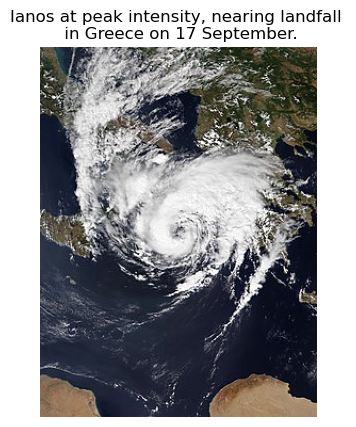

In [1]:
from skimage import io
import matplotlib.pyplot as plt
# create a file-like object from the url
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Ianos_2020-09-17_1140Z.jpg/260px-Ianos_2020-09-17_1140Z.jpg"
a = io.imread(url)
# read the image file in a numpy array
plt.title('Ianos at peak intensity, nearing landfall \n in Greece on 17 September.')
plt.imshow(a)
plt.axis('off')
plt.show()

| Type | Formed | Dissipated | Highest winds | Fatalities | Damage | Areas affected |
|:--------------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Mediterranean tropical-like cyclone | 14 September 2020 | 21 September 2020 | 1-minute sustained: 100 mph (160 km/h) | 4 dead, 1 missing | ≥ $100 million (2020 USD) | Libya, Italy, Malta, Greece, Crete, Cyrenaica | 

<div class="alert alert-block alert-warning">

### Important:
<font size="3"> Please make sure to install FLOODPY according to the [instructions](https://flompy.readthedocs.io/en/latest/installation.html)
</font>

<div>

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Set input arguments for FLOODPY
[Back to top](#TOC_TOP)

</div>


### Information required based on configuration file of FLOODPY

#### 	A. Project Definition  

In [2]:
#A1. The name of your project withough special characters.
Projectname = 'Ianos'

#A2. The location that everything is going to be saved. Make sure 
#    you have enough free space disk on the specific location.
projectfolder = '/home/kleanthis/Projects/Ianos'

#A3. The location of floodpy code 
src_dir = '/home/kleanthis/Projects/FLOODPY/floodpy/'

#A4. SNAP ORBIT DIRECTORY
snap_dir = '/home/kleanthis/.snap/auxdata/Orbits/Sentinel-1'

#A5. SNAP GPT full path
GPTBIN_PATH = '/home/kleanthis/snap9/bin/gpt'


#### B. Flood event temporal information  

Your have to provide the datetime of your flood event. Make sure that
a flood event took place at your provided datetime. 
Based on your knowledge you can change [before_flood_days] in order
to create a biggest Sentinel-1 image that is going to be used to extract 
flood information will be between Flood_datetime and 
Flood_datetime+after_flood_days
the closest Sentinel-1 to the Flood_datetime is picked.

In [3]:
# B1. The datetime of flood event (Format is YYYYMMDDTHHMMSS)
Flood_datetime = '20200921T030000'

# B2. Days before flood event for baseline stack construction
before_flood_days = 20

# B3. Days after flood event
after_flood_days = 3

####  C. Flood event spatial information 

You can provide AOI VECTOR FILE or AOI BBOX. 
Please ensure that your AOI BBOX has dimensions smaller than 100km x 100km
If you provide AOI VECTOR, AOI BBOX parameters will be ommited
In case you provide AOI BBOX coordinates, set  AOI_File = None

In [4]:
# C1. AOI VECTOR FILE (if given AOI BBOX parameters can be ommited)
AOI_File = "None"

# C2. AOI BBOX (WGS84)
LONMIN=22.02
LATMIN=39.46
LONMAX=22.17
LATMAX=39.518

####  D. Precipitation information   

Based on your knowledge, provide information related to the 
accumulated precipitation that is required in order a flooding to occur. 
These particular values will be used to classify Sentinel-1 images
which images correspond to flood and non-flood conditions.


In [5]:
# D1. number of consequent days that precipitation will be accumulated.
#       before each Sentinel-1 acquisition datetime
days_back = 12

# D2. The threshold of acculated precipitation [mm]
accumulated_precipitation_threshold = 120

#### E.  Data access and processing

In [6]:
#E1. The number of Sentinel-1 relative orbit. The default 
#       value is Auto. Auto means that the relative orbit that has
#       the Sentinel-1 image closer to the Flood_datetime is selected. 
#       S1_type can be GRD or SLC.
S1_type = 'GRD'
relOrbit = 'Auto'

#E3. The minimum mapping unit area in square meters
minimum_mapping_unit_area_m2=4000

#E4. Computing resources to employ
CPU=8
RAM='20G'

#E5. Credentials for Sentinel-1/2 downloading
scihub_username = 'flompy'
scihub_password = 'rslab2022'
aria_username = 'floodpy'
aria_password = 'RSlab2022'

<div class="alert alert-info" role="alert">

## <a id='section2'></a>3. Estimation of Flooded Area using Sentinel-1 data
[Back to top](#TOC_TOP)
</div>

### <a id='search_download'></a> 3.1 Insert Python Modules

In [7]:
import os
import glob
import numpy as np
import rasterio as rio
import rasterio.mask
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from branca.element import Template, MacroElement
import warnings
warnings.filterwarnings('ignore')
# FLOODPY libraries
from floodpy.FLOODPYapp import FloodwaterEstimation

FLOod Mapping PYthon toolbox
Copyright (c) 2021-2022 Kleanthis Karamvasis, Alekos Falagas
Remote Sensing Laboratory of National Technical University of Athens
-----------------------------------------------------------------
License: GNU GPL v3+
-----------------------------------------------------------------


### <a id='search_download'></a> 3.2 Configuration Parameters

In [8]:
Conf_parms = {
    'Projectname' : Projectname,
    'projectfolder' : projectfolder,
    'src_dir' : src_dir,
    'snap_dir' : snap_dir,
    'GPTBIN_PATH': GPTBIN_PATH,
    'Flood_datetime': Flood_datetime,
    'before_flood_days': before_flood_days,
    'after_flood_days' : after_flood_days,
    'AOI_File' : AOI_File,
    'LONMIN' : LONMIN,
    'LATMIN' : LATMIN,
    'LONMAX' : LONMAX,
    'LATMAX' : LATMAX,
    'days_back' : days_back,
    'accumulated_precipitation_threshold' : accumulated_precipitation_threshold,
    'S1_type' : S1_type,
    'relOrbit' : relOrbit,
    'minimum_mapping_unit_area_m2' : minimum_mapping_unit_area_m2,
    'CPU' : CPU,
    'RAM' : RAM,
    'scihub_username' : scihub_username,
    'scihub_password' : scihub_password,
    'aria_username' : aria_username,
    'aria_password' : aria_password,
    }

### <a id='search_download'></a> 3.3 Start up

In [9]:
app = FloodwaterEstimation(parmsdict = Conf_parms)
app.startup()

0

### <a id='search_download'></a>3.4 Downloading Precipitation from ERA5 model


Based on given temporal range, ERA5 dataset is retrieved for 20 days before the flood event and 3 dates after the flood event. The defined area of interest is used to spatially subset the dataset.

In [10]:
app.run_download_Precipitation_data('Download_Precipitation_data')

Precipitation data can be found at /home/kleanthis/Projects/Ianos/ERA5


0

<AxesSubplot:xlabel='Datetime'>

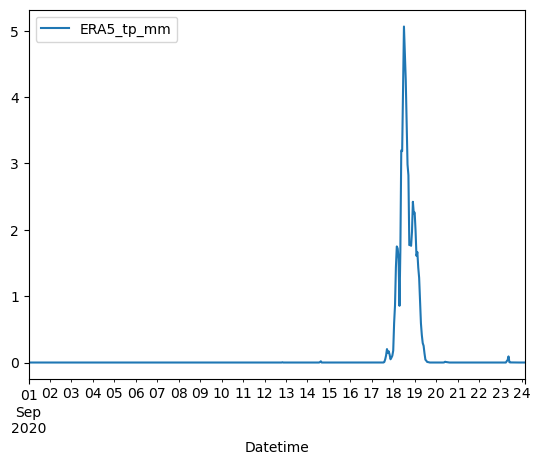

In [11]:
precipitation_df = pd.read_csv(glob.glob(os.path.join(app.projectfolder,'ERA5/*.csv'))[0])
precipitation_df.index = pd.to_datetime(precipitation_df['Datetime'])
precipitation_df.plot()

### <a id='search_download'></a>3.5 Downloading Sentinel-1 backscatter observations


In [12]:
# Downloading Sentinel-1 dataset
app.run_download_S1_data('Download_S1_data')
# Downloading in the terminal works fine
# I have to fix the downloading from jupyter.

Found 20 products


S1A_IW_GRDH_1SDV_20200921T043931_20200921T043956_034452_04021B_A9F1.SAFE acquisition 
 was acquired after 1.66 hours from the user-defined datetime of flood event 2020-09-21 03:00:00
This is download try # 1.
 We will try to download the requested products in 01 minutes.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:19<00:00,  4.93s/it]

Sentinel-1 data and orbit information have been successfully downloaded


0

### <a id='search_download'></a> 3.6 Preprocessing of multitemporal Sentinel-1 data

Preprocessing of Sentinel-1 SAR acquisitions consists of the following steps:
- Orbit correction
- Coregistration
- Subsetting
- Radiometric Calibration
- Geocoding

In [13]:
app.run_preprocessing_S1_data('Preprocessing_S1_data')

 We coregister the images in respect with the acquisition of S1A_IW_GRDH_1SDV_20200921T043931_20200921T043956_034452_04021B_A9F1.zip
Processing of flood image 20200921T043931
Processing of baseline image 20200903T043849
Processing of baseline image 20200909T043931
Processing of baseline image 20200915T043849
Refine borders of Sentinel-1 acquisitions
20200903T043849
20200909T043931
20200915T043849
Baseline Stack images:
20200903T043849
20200909T043931
20200915T043849
Flood image:
20200921T043931
All information from SAR imagery are stored at /home/kleanthis/Projects/Ianos/Preprocessed/Stack/SAR_Stack.h5


0

### <a id='search_download'></a> 3.7 Temporal Change Detection Analysis using Sentinel-1 backscattering values

Generation of t-score statistic map based on pre-flood and post-flood SAR observations.
### Add t-score formula

In [14]:
app.run_multitemporal_statistics('Statistical_analysis')


A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.055734

A Aspect attribute calculation
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.0712936


['20200903T043849', '20200909T043931', '20200915T043849', '20200921T043931']
T-score changes due to flood can be found at /home/kleanthis/Projects/Ianos/Results/t_scores_VV_VH_db.tif


0

### <a id='search_download'></a> 3.8 Identification of Flooded Regions based on adaptive thresholding 

In [15]:
app.run_get_flood_map('Floodwater_classification')

Floodwater map can be found at /home/kleanthis/Projects/Ianos/Results/Flood_map_Ianos.tif


0

<div class="alert alert-danger" role="alert">
<font size="3">Free up disk. Deleting all Sentinel-1 data in order to have enough memory space due to 10 Gb available space.
</font>
</div>

In [ ]:
#! rm *.zip

<div class="alert alert-info" role="alert">

## <a id='section3'></a>4. Calculation of Flood analytics
[Back to top](#TOC_TOP)
</div>

### <a id='search_download'></a> 4.1 Download recent Sentinel-2 imagery

In [ ]:
# Quering Sentinel-2 data and select best scenes
Sentinel_2_download.Download_S2_data(
    AOI = app.geojson_S1,
    user = list(app.credentials.keys())[0],
    passwd = list(app.credentials.values())[0],
    Start_time = app.Start_time,
    End_time = app.End_time,
    write_dir = app.S2_dir,
    product = 'S2MSI2A',
    download = False,
    cloudcoverage = 100,
    to_file = True)

# Downloading Sentinel-2 data using HDA API
retrieve.S2_data(app.bbox, app.S2_dir)

### <a id='search_download'></a> 4.2 Download land cover information

In [17]:
# to do
# download ESA Worldcover map

### <a id='search_download'></a> 3.2 Crop Field Delineation & Characterization as Cultivated or Not-Cultivated

Crop delineation consists of the following steps (estimated time to finish ~25mins):

1. Determine agricultural regions based on [ESA WorldCover (2020)](https://worldcover2020.esa.int/) map, with 10m spatial resolution. Mask urban regions, forests and water bodies and retain only the agricultural regions.

    Also, Sentinel-2 L2A Scene Classification products are used in order to mask cloudy, shadowed or saturated pixels. 

2. Construct edge intensity and crop intensity maps using NDVI and edge detection filters, based on [L. Yan and D.P. Roy. 2014](https://doi.org/10.1016/j.rse.2014.01.006).

3. Determine crop-edges using a pre-trained U-Net model.

4. Combine the above raster products, execute some morphological filters and vectorize the result, to produce a crop-instance vector product.

5. For a field to be considered as flooded, more than 30% of its area must intersect with the flood.

6. Characterize flooded fields as cultivated or not-cultivated, by appling combined thresholdind to edge intensity and crop intensity maps.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Interactive Plotting
[Back to top](#TOC_TOP)
</div>



### <a id='search_download'></a> 4.1 Flooded Agricultural Map

Todo: Add t-score image, recent Sentinel-2 image, land cover information


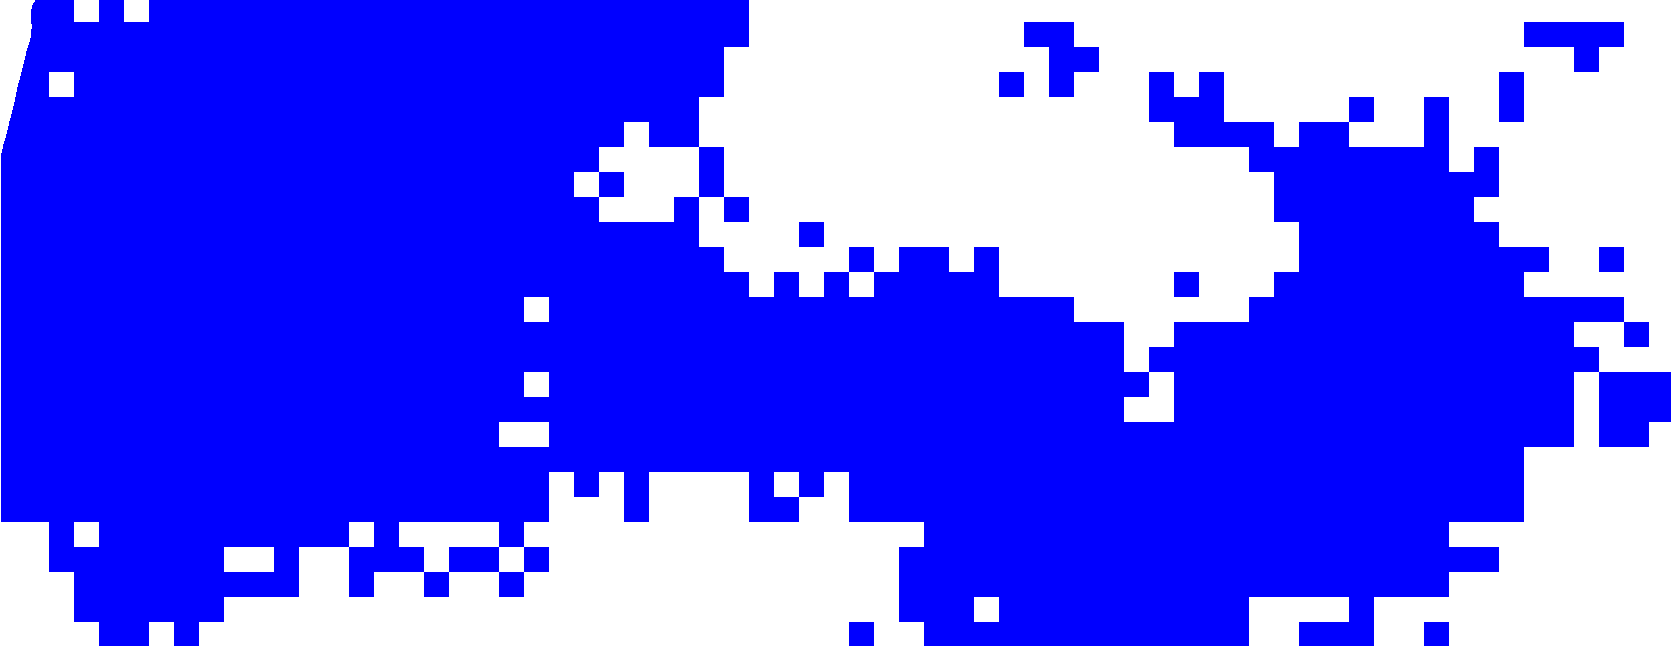

In [16]:
# Read AOI
aoi = gpd.read_file(app.geojson_S1)

# AOI bounds
left, bottom, right, top = aoi.total_bounds

# Define map bounds
map_bounds = [[bottom, left], [top, right]]

# Read flood image using AOI
flood_fpath = glob.glob(os.path.join(app.Results_dir, 'Flood_map_*.tif'))[0]
with rio.open(flood_fpath) as src:
    flood, out_transform = rasterio.mask.mask(src, aoi.geometry, crop=True)
    flood = flood[0,:,:]
    
# Create a map located to the AOI
m = folium.Map(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr = 'Esri',
    location=[aoi.centroid.y[0], aoi.centroid.x[0]],
    zoom_start=13)

# Add flood image to the map, flood background is transparent
raster_to_coloridx = {1: (0.0, 0.0, 1.0, 1.0),
                      0: (0.0, 0.0, 0.0, 0.0)}

# Show map
m.add_child(folium.raster_layers.ImageOverlay(flood, 
                                             opacity=0.5,
                                             bounds=map_bounds,
                                             colormap=lambda x: raster_to_coloridx[x]))
m

### <a id='search_download'></a> 4.2 Delineated Flooded Fields, characterized as Cultivated or Not-Cultivated

<div class="alert alert-block alert-warning">

### Feedback:
<font size="3"> Feel free to contact us if you this notebook was helpful or if you are interested in flood analytics from remote sensing data. 
Contact email : floodmappingteam@gmail.com
</font>

<div>